Кластеризация 

«Разделяет обьекты по неизвестному признаку. Машина сама решоет как лучше» 

Сегодня используют для: 

*Сегментация рынка (типов покупателей, лояльности) 

*Объединение близких точек на карте 

*Сжатие изображений 

*Анализ и разметки новых данных 

*Детекторы аномального поведения 

Кластеризация - это классификация, но без заранее известных классов. Она сама ищет похожие объекты и объединяет их в кластеры. Количество кластеров можно задать заранее или доверить это машине. Похожесть объектов машина определяет по тем признакам, которые ей разметили, объекты со схожими характеристиками определяются в один класс. 

Кластеризация (cluster analysis) — задача группировки множества объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров по какому-либо критерию.

Задача кластеризации относится к классу задач обучения без учителя.

Цели кластеризации могут быть различными в зависимости от особенностей конкретной прикладной задачи: 

*Упростить дальнейшую обработку данных, разбить множество X^n на группы схожих объектов чтобы работать с каждой группой в отдельности (задачи классификации, регрессии, прогнозирования).

*Сократить объём хранимых данных, оставив по одному представителю от каждого кластера (задачи сжатия данных).

*Выделить нетипичные объекты, которые не подходят ни к одному из кластеров (задачи одноклассовой классификации).

*Построить иерархию множества объектов (задачи таксономии). 


Каждый метод кластеризации имеет свои ограничения и выделяет кластеры лишь некоторых типов. 

Понятие «тип кластерной структуры» зависит от метода и также не имеет формального определения.


In [166]:
import numpy as np
import pandas as pd
from openpyxl import load_workbook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans

In [159]:
#смотрим данные
cust_df = pd.read_csv('table51.csv', delimiter=';')
cust_df.head()

,NaturalPersonID,RequestDate,ProductName,CreditSum,TypeOfWork,Employment,SignIP,sex,age,EducationStatus,...,kolichestvo_detej_mladshe_18,LivingRegionName,Residence,IncomeDocumentKind,HaveSalaryCard,IsBankWorker,TypeOfWork.1,SignIP.1,harakteristika_tekutschego_trudoustrojstva,ConfirmedMonthlyIncome (Target)
0,1ABD801A-0580-4C4F-9682-E7E85A749981,16.10.2018,Кредит на потребительские нужды,500000.0,NaN,Сотрудник \ Рабочий \ Ассистент,NaN,Женский,49,Высшее образование,...,0,Самара,город,Выписка по счету,нет,да,NaN,NaN,Постоянная. полная занятость,30691.36
1,7B427911-9B96-443E-9EBA-76A02515E1BE,19.10.2018,Кредит на потребительские нужды,708000.0,NaN,Главный Специалист\Руководитель среднего звена,NaN,Женский,44,Среднее специальное образование,...,0,Казань,село,Выписка по счету,да,нет,NaN,NaN,Постоянная. полная занятость,25712.07
2,4B867BD5-6398-4400-99CA-CF208714AF9A,02.11.2018,Кредит на потребительские нужды,665000.0,NaN,Сотрудник \ Рабочий \ Ассистент,NaN,Мужской,29,Высшее образование,...,1,Казань,город,Выписка по счету,да,нет,NaN,NaN,Постоянная. полная занятость,31081.26
3,ED654BFA-A7E7-4280-84CA-D6EAE80E45E2,02.11.2018,Кредит на потребительские нужды,458000.0,NaN,Сотрудник \ Рабочий \ Ассистент,NaN,Женский,59,Несколько высших образований,...,0,Зеленодольский,село,2-НДФЛ,да,нет,NaN,NaN,Постоянная. полная занятость,17848.79
4,CCA3FF37-D508-449E-869A-6ED4CB6F9943,15.10.2018,Кредит на потребительские нужды,969000.0,NaN,Сотрудник \ Рабочий \ Ассистент,NaN,Мужской,51,Высшее образование,...,2,Тюмень,город,2-НДФЛ,нет,нет,NaN,NaN,Постоянная. полная занятость,115380.53


In [3]:
#выбираем те данные, с которыми будем работать
df = cust_df[['CreditSum', 'age', 'kolichestvo_detej_mladshe_18', 'ConfirmedMonthlyIncome (Target)']]
df.head()

,CreditSum,age,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
0,500000.0,49,0,30691.36
1,708000.0,44,0,25712.07
2,665000.0,29,1,31081.26
3,458000.0,59,0,17848.79
4,969000.0,51,2,115380.53


In [4]:
X = df.values[:,0:]
X = np.nan_to_num(X)
X

array([[5.000000e+05, 4.900000e+01, 0.000000e+00, 3.069136e+04],
       [7.080000e+05, 4.400000e+01, 0.000000e+00, 2.571207e+04],
       [6.650000e+05, 2.900000e+01, 1.000000e+00, 3.108126e+04],
       ...,
       [6.000000e+05, 3.400000e+01, 1.000000e+00, 6.486240e+04],
       [3.762500e+05, 2.600000e+01, 0.000000e+00, 3.132647e+04],
       [1.050000e+05, 3.300000e+01, 1.000000e+00, 7.117874e+04]])

In [5]:
#K-Means
clusterNum = 5
k_means = KMeans(init="k-means++",n_clusters=clusterNum,n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[4 1 4 ... 4 4 0]


In [9]:
#добавляем столбец, в котором будет написано к какому кластеру относится строка
df.loc[:,'Clust_km'] = labels
df.head(5)

,CreditSum,age,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),Clust_km
0,500000.0,49,0,30691.36,4
1,708000.0,44,0,25712.07,1
2,665000.0,29,1,31081.26,4
3,458000.0,59,0,17848.79,4
4,969000.0,51,2,115380.53,1


In [10]:
#смотрим среднее значение по каждому кластеру
df.groupby('Clust_km').mean()

,CreditSum,age,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
Clust_km,,,,
0,1.393342e+05,37.687024,0.575365,33192.300985
1,8.495519e+05,40.636664,0.731966,53641.900979
2,1.857048e+06,40.655172,0.913793,95555.901405
3,6.000000e+06,41.250000,1.250000,147531.750000
4,4.824164e+05,39.805207,0.621775,41726.436047


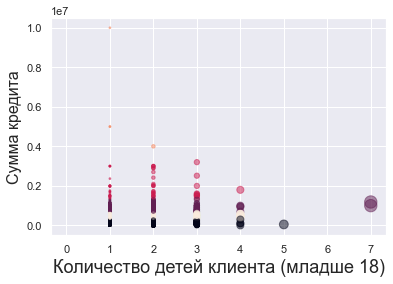

In [11]:
area = np.pi*(X[:,2])**2
plt.scatter(X[:,2],X[:,0],s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Количество детей клиента (младше 18)', fontsize=18)
plt.ylabel('Сумма кредита', fontsize=16)
plt.show()

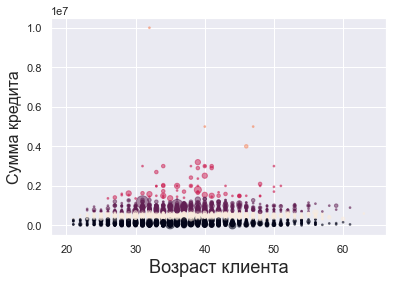

In [12]:
#хорошо видно различие кластеров благодаря цветам
area = np.pi*(X[:,2])**2
plt.scatter(X[:,1],X[:,0],s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Возраст клиента', fontsize=18)
plt.ylabel('Сумма кредита', fontsize=16)
plt.show()

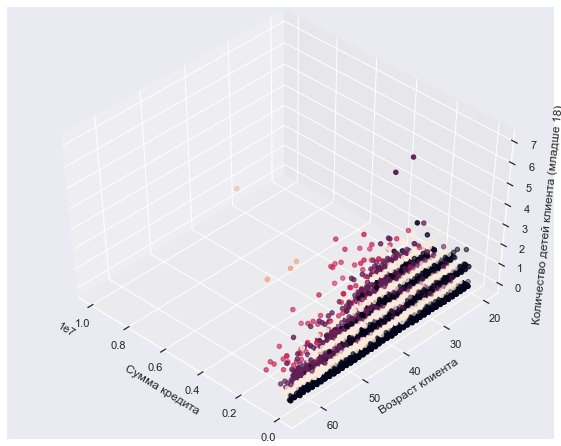

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax=Axes3D(fig,rect=[0,0, .95,1], elev=48,azim=134)
ax.set_xlabel('Сумма кредита')
ax.set_ylabel('Возраст клиента')
ax.set_zlabel('Количество детей клиента (младше 18)')
ax.scatter(X[:,0],X[:,1], X[:,2], c=labels.astype(np.float))

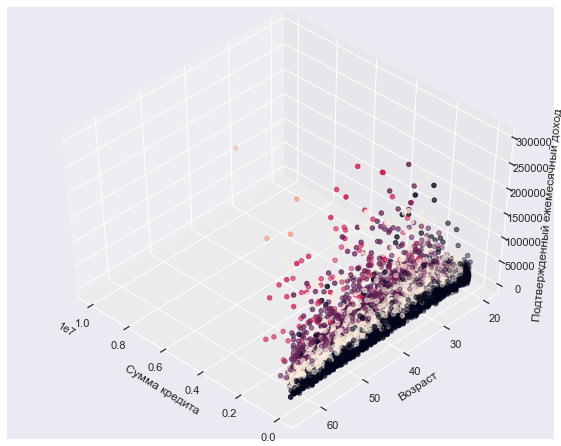

In [14]:
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax=Axes3D(fig,rect=[0,0, .95,1], elev=48,azim=134)
ax.set_xlabel('Сумма кредита')
ax.set_ylabel('Возраст')
ax.set_zlabel('Подтвержденный ежемесячный доход')
ax.scatter(X[:,0],X[:,1], X[:,3], c=labels.astype(np.float))

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
Y = df.values[:,0:]
Y = np.nan_to_num(Y)
Y

array([[5.000000e+05, 4.900000e+01, 0.000000e+00, 3.069136e+04,
        4.000000e+00],
       [7.080000e+05, 4.400000e+01, 0.000000e+00, 2.571207e+04,
        1.000000e+00],
       [6.650000e+05, 2.900000e+01, 1.000000e+00, 3.108126e+04,
        4.000000e+00],
       ...,
       [6.000000e+05, 3.400000e+01, 1.000000e+00, 6.486240e+04,
        4.000000e+00],
       [3.762500e+05, 2.600000e+01, 0.000000e+00, 3.132647e+04,
        4.000000e+00],
       [1.050000e+05, 3.300000e+01, 1.000000e+00, 7.117874e+04,
        0.000000e+00]])

In [19]:
#DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2).fit(Y)
print(dbscan)
labels2 =dbscan.labels_
print(labels2)

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)
[-1 -1 -1 ... -1 -1 -1]


In [20]:
#количесвто кластеров, на которое данные разбились
n_clusters_ = len(set(labels2)) - (1 if -1 in labels2 else 0)
print('Расчетное количество кластеров: %d' % n_clusters_)

Расчетное количество кластеров: 39


In [24]:
df.loc[:,'Clust_dbscan'] = labels2
df.head(5)

,CreditSum,age,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),Clust_km,Clust_dbscan
0,500000.0,49,0,30691.36,4,-1
1,708000.0,44,0,25712.07,1,-1
2,665000.0,29,1,31081.26,4,-1
3,458000.0,59,0,17848.79,4,-1
4,969000.0,51,2,115380.53,1,-1


In [25]:
#смотрим среднее значение по кластерам
df.groupby('Clust_dbscan').mean()

,CreditSum,age,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),Clust_km
Clust_dbscan,,,,,
-1,395564.678303,38.981386,0.618501,40180.727214,1.738554
0,31000.000000,31.666667,1.333333,25000.000000,0.000000
1,31000.000000,28.000000,0.500000,22683.245000,0.000000
2,31000.000000,28.000000,0.000000,23683.140000,0.000000
3,31000.000000,32.500000,2.000000,30000.000000,0.000000
4,326250.000000,49.000000,0.000000,19092.420000,4.000000
5,100000.000000,22.000000,0.000000,29686.005000,0.000000
6,31000.000000,52.000000,0.000000,22155.985000,0.000000
7,603000.000000,38.000000,2.000000,36614.530000,4.000000


In [27]:
df1 =df[['CreditSum', 'age', 'kolichestvo_detej_mladshe_18', 'ConfirmedMonthlyIncome (Target)', 'Clust_dbscan']]
df1.head()

,CreditSum,age,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),Clust_dbscan
0,500000.0,49,0,30691.36,-1
1,708000.0,44,0,25712.07,-1
2,665000.0,29,1,31081.26,-1
3,458000.0,59,0,17848.79,-1
4,969000.0,51,2,115380.53,-1


In [28]:
df1.groupby('Clust_dbscan').mean()

,CreditSum,age,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
Clust_dbscan,,,,
-1,395564.678303,38.981386,0.618501,40180.727214
0,31000.000000,31.666667,1.333333,25000.000000
1,31000.000000,28.000000,0.500000,22683.245000
2,31000.000000,28.000000,0.000000,23683.140000
3,31000.000000,32.500000,2.000000,30000.000000
4,326250.000000,49.000000,0.000000,19092.420000
5,100000.000000,22.000000,0.000000,29686.005000
6,31000.000000,52.000000,0.000000,22155.985000
7,603000.000000,38.000000,2.000000,36614.530000


In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR

In [140]:
df_all = df[['CreditSum', 'age', 'kolichestvo_detej_mladshe_18', 'ConfirmedMonthlyIncome (Target)']]
df_all.head()

,CreditSum,age,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
1,708000.0,44,0,25712.07
2,665000.0,29,1,31081.26
3,458000.0,59,0,17848.79
4,969000.0,51,2,115380.53
5,35000.0,35,0,39578.97


In [141]:
df.head()

,CreditSum,age,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),Clust_km,Clust_dbscan
1,708000.0,44,0,25712.07,1,-1
2,665000.0,29,1,31081.26,4,-1
3,458000.0,59,0,17848.79,4,-1
4,969000.0,51,2,115380.53,1,-1
5,35000.0,35,0,39578.97,0,-1


In [142]:
#сформируем выборку данных для обучения модели
A = df.drop(['ConfirmedMonthlyIncome (Target)'], axis=1)
B = df['ConfirmedMonthlyIncome (Target)']

In [143]:
A = np.nan_to_num(A)
A[0:5]

array([[ 7.08e+05,  4.40e+01,  0.00e+00,  1.00e+00, -1.00e+00],
       [ 6.65e+05,  2.90e+01,  1.00e+00,  4.00e+00, -1.00e+00],
       [ 4.58e+05,  5.90e+01,  0.00e+00,  4.00e+00, -1.00e+00],
       [ 9.69e+05,  5.10e+01,  2.00e+00,  1.00e+00, -1.00e+00],
       [ 3.50e+04,  3.50e+01,  0.00e+00,  0.00e+00, -1.00e+00]])

In [144]:
B = np.nan_to_num(B)
B[0:5]

array([ 25712.07,  31081.26,  17848.79, 115380.53,  39578.97])

In [145]:
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.1)
print('Train data shape')
print(X_train.shape)
print('Test data shape')
print(X_test.shape)

Train data shape
(9646, 5)
Test data shape
(1072, 5)


In [146]:
#X_train, X_test, y_train, y_test = train_test_split(df.drop(['CreditSum'],axis='columns'),df['CreditSum'],test_size=0.2)

In [165]:
# model = SVR(RandomForestClassifier(),gamma='auto')
# model.fit(X_train, y_train)

In [152]:
#model.score(X_test,y_test)